
<div class="note">
    <p style="margin-top: 0; margin-bottom: 0;">
        <img style="margin-top: 0; margin-bottom: 0; height: 2em;" class="inline-block mr-2 no-fancybox"
            src="https://upload.wikimedia.org/wikipedia/commons/3/38/Jupyter_logo.svg" alt="">
        This page is based on a Jupyter notebook.
<a href="./ogs-jupyter-lab-h2m-2d-liakopoulos.ipynb" download="ogs-jupyter-lab-h2m-2d-liakopoulos.ipynb"><img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" src="https://img.shields.io/static/v1?label=Download:&message=ogs-jupyter-lab-h2m-2d-liakopoulos.ipynb&color=blue" /></a>
<a href="https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/TH2M/H2M/Liakopoulos/ogs-jupyter-lab-h2m-2d-liakopoulos.py"><img src="https://img.shields.io/static/v1?label=Source:&message=ogs-jupyter-lab-h2m-2d-liakopoulos.py&color=brightgreen" class="no-fancybox"
        style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;" /></a>
<a href="https://binder.opengeosys.org/v2/gh/bilke/binder-ogs-requirements/6.5.6-0.7.0?urlpath=git-pull%3Frepo=https://gitlab.opengeosys.org/ogs/ogs%26urlpath=lab/tree/ogs/Tests/Data/TH2M/H2M/Liakopoulos/ogs-jupyter-lab-h2m-2d-liakopoulos.py%26branch=6.5.6%26depth=1">
    <img class="no-fancybox" style="display: inline; margin-top: 0; margin-bottom: 0; margin-left: 1em;"
        src="https://img.shields.io/static/v1?label=&message=Launch notebook&color=5c5c5c&logo=" />
</a></p></div>



In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import ogstools as ot

out_dir = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
out_dir.mkdir(parents=True, exist_ok=True)

# H2M process: Liakopoulos benchmark

## Problem description

![](figures/liakopoulos.png =x400)

The Liakopoulos experiment was dealing with a sand column which was filled with water first and then drained under gravity.
A sketch of the related model set-up including initial and boundary conditions is shown in the above figure.
A detailed description of the underlying OGS model is given in Grunwald et al. (2022). Two hydraulic models have been compared; two-phase flow with a mobile and a Richards flow with an immobile gas phase coupled to mechanical processes. Due to the absence of analytical solutions various numerical solutions have been compared in the past (see Grunwald et al., 2022).

The model parameters are given in the below table.

| Parameter | Value | Unit |
| :-: | :-: | :-: |
| Permeability | $k^0_\textrm{S}$ = 4.5 $\times$ 10$^{-13}$ | m$^2$ |
| Porosity | $\phi$ = 0.2975 | - |
| Young's modulus | $E$ = 1.3 | MPa |
| Poisson ratio | $\nu$ = 0.4 | - |
| Dynamic viscosity of gas phase | $\mu_\textrm{GR}$ = 1.8 $\times$ 10$^{-5}$ | Pa s |
| Dynamic viscosity of liquid phase | $\mu_\textrm{LR}$ = 1.0 $\times$ 10$^{-3}$ | Pa s |
| Density of liquid phase | $\rho_\textrm{LR}$ = 1.0$\times$ 10$^3$ | kg m$^{-3}$ |
| Density of solid phase | $\rho_\textrm{SR}$ = 2.0$\times$ 10$^3$ | kg m$^{-3}$ |

## Numerical solution

In [2]:
prj_file = "liakopoulos_TH2M.prj"
model = ot.Project(input_file=prj_file, output_file=prj_file)
model.run_model(logfile=f"{out_dir}/out.txt", args=f"-o {out_dir}")

Project file written to output.
Simulation: liakopoulos_TH2M.prj
Status: finished successfully.
Execution took 8.044421195983887 s


In [3]:
ms = ot.MeshSeries(f"{out_dir}/result_liakopoulos.pvd")

# plausibility checks
max_vals = {"gas_pressure": 1.02e5, "capillary_pressure": 1e4,
            "saturation": 1.0001, "displacement": 0.005}  # fmt:skip


def plot_sample(var: ot.variables.Scalar) -> None:
    fig, ax = plt.subplots(figsize=[6, 3], dpi=150)
    ax.set_xlabel(r"$y$ / m")
    ax.set_ylabel(var.get_label())
    for mesh, t in zip(ms, ms.timevalues, strict=True):
        line_mesh = mesh.sample_over_line([0, 0, 0], [0, 1, 0])
        vals = line_mesh.sample(mesh)[var.data_name]
        assert np.all(np.abs(vals) <= max_vals[var.data_name]), max(abs(vals))
        ax.plot(line_mesh.points[:, 1], var.transform(vals), label=f"{t=}", lw=2.5)
    ax.legend()
    ax.grid()
    fig.tight_layout()

### Gas Pressure

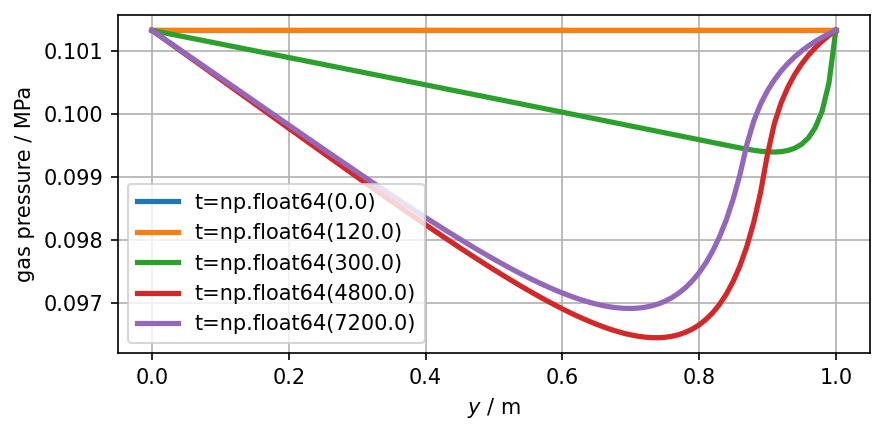

In [4]:
plot_sample(ot.variables.Scalar("gas_pressure", "Pa", "MPa"))

### Capillary Pressure

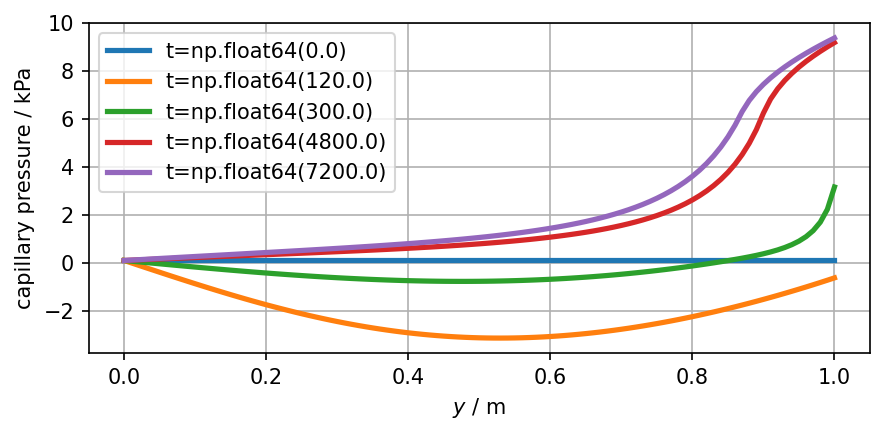

In [5]:
plot_sample(ot.variables.Scalar("capillary_pressure", "Pa", "kPa"))

### Saturation

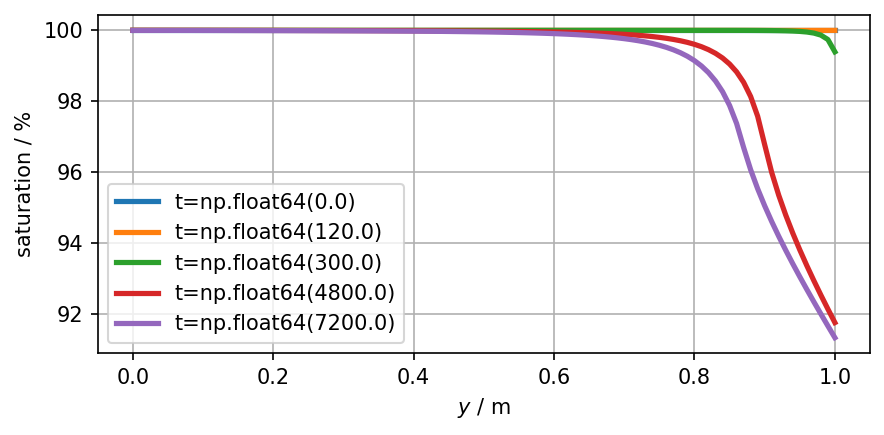

In [6]:
plot_sample(ot.variables.Scalar("saturation", "", "%"))

### Vertical Displacement

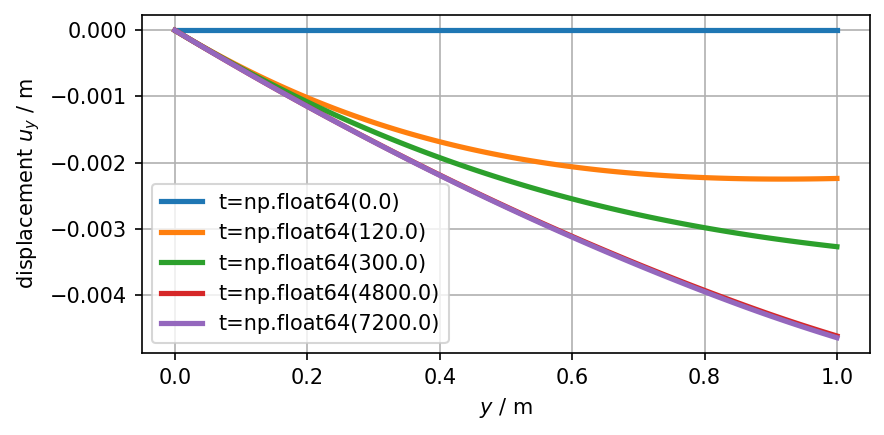

In [7]:
plot_sample(ot.variables.displacement["y"])

**OGS links**
- description: https://www.opengeosys.org/docs/benchmarks/
- project file: https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/TH2M/H2M/Liakopoulos/liakopoulos_TH2M.prj

**Credits**
- Norbert Grunwald for set-up the OGS benchmark, https://gitlab.opengeosys.org/ogs/ogs/-/blob/master/Tests/Data/TH2M/H2M/Liakopoulos/liakopoulos_TH2M.prj

**References**

Grunwald, N., Lehmann, C., Maßmann, J., Naumov, D., Kolditz, O., Nagel, T., (2022): Non-isothermal two-phase flow in deformable porous media: systematic open-source implementation and verification procedure. Geomech. Geophys. Geo-Energy Geo-Resour. 8 (3), art. 107
        https://doi.org/10.1007/s40948-022-00394-2

Kolditz, O., Görke, U.-J., Shao, H., Wang, W., (eds., 2012): Thermo-hydro-mechanical-chemical processes in porous media: Benchmarks and examples. Lecture Notes in Computational Science and Engineering 86, Springer, Berlin, Heidelberg, 391 pp
        https://link.springer.com/book/10.1007/978-3-642-27177-9

Lewis RW, Schrefler BA (1998): The finite element method in the static and dynamic deformation and consolidation of porous media. Wiley, New York
    https://www.wiley.com/en-us/The+Finite+Element+Method+in+the+Static+and+Dynamic+Deformation+and+Consolidation+of+Porous+Media%2C+2nd+Edition-p-9780471928096

Liakopoulos AC (1964): Transient flow through unsaturated porous media. PhD thesis. University of California, Berkeley, USA.
sources: OGS BMB1 (sec. 13.2